<a href="https://colab.research.google.com/github/SitwalaM/nlp-topic-modelling/blob/main/notebooks/topic_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries and Files


In [86]:
#import libraries

import numpy as np # linear algebra
import pandas as pd # data processing
import os
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce
import seaborn as sns

In [87]:
#1. Read the files 


df = pd.read_csv('/content/output.csv')

In [88]:
df.head(5)

,Unnamed: 0,id,retweet_count,date_created,tweet,clean_tweet,topic
0,0,1508758968482635778,1092,2022-03-29 10:52:24+00:00,b'A 31-year-old Ugandan traditional healer liv...,year ugandan traditional healer living south a...,3
1,1,1508661904192913410,2275,2022-03-29 04:26:42+00:00,"b'Date mein kya rakha hai?\nMarch 29th, a very...",date mein rakha nmarch significant date cricke...,7
2,2,1508815292578816015,563,2022-03-29 14:36:12+00:00,b'Moeletsi Mbeki has accused South Africa\xe2\...,moeletsi mbeki accused south africa ruling par...,1
3,3,1509067192888926208,9,2022-03-30 07:17:10+00:00,"b""RT @ThamiMasemola: Isuzu Motors South Africa...",isuzu motors south africa begun manufacturing ...,4
4,4,1509067189827026945,0,2022-03-30 07:17:09+00:00,"b'SAFA President, ANC Dr Danny Jordaan \n\nIs ...",safa president danny jordaan destroying footba...,2


In [89]:
# Split datetime into date and time
df['date'] = pd.to_datetime(df['date_created']).dt.date
df['time'] = pd.to_datetime(df['date_created']).dt.time
df.head()

,Unnamed: 0,id,retweet_count,date_created,tweet,clean_tweet,topic,date,time
0,0,1508758968482635778,1092,2022-03-29 10:52:24+00:00,b'A 31-year-old Ugandan traditional healer liv...,year ugandan traditional healer living south a...,3,2022-03-29,10:52:24
1,1,1508661904192913410,2275,2022-03-29 04:26:42+00:00,"b'Date mein kya rakha hai?\nMarch 29th, a very...",date mein rakha nmarch significant date cricke...,7,2022-03-29,04:26:42
2,2,1508815292578816015,563,2022-03-29 14:36:12+00:00,b'Moeletsi Mbeki has accused South Africa\xe2\...,moeletsi mbeki accused south africa ruling par...,1,2022-03-29,14:36:12
3,3,1509067192888926208,9,2022-03-30 07:17:10+00:00,"b""RT @ThamiMasemola: Isuzu Motors South Africa...",isuzu motors south africa begun manufacturing ...,4,2022-03-30,07:17:10
4,4,1509067189827026945,0,2022-03-30 07:17:09+00:00,"b'SAFA President, ANC Dr Danny Jordaan \n\nIs ...",safa president danny jordaan destroying footba...,2,2022-03-30,07:17:09


In [90]:
select_topic = [int(input("Enter topic number: "))]
print(select_topic)

Enter topic number: 2
[2]


In [91]:
df_topic = df[df['topic'].isin(select_topic)]
df_topic.head(100)

,Unnamed: 0,id,retweet_count,date_created,tweet,clean_tweet,topic,date,time
4,4,1509067189827026945,0,2022-03-30 07:17:09+00:00,"b'SAFA President, ANC Dr Danny Jordaan \n\nIs ...",safa president danny jordaan destroying footba...,2,2022-03-30,07:17:09
5,5,1509067166997381124,0,2022-03-30 07:17:04+00:00,"b""@GicAriana Russia's circumstances sound like...",russia circumstances sound like south africa y...,2,2022-03-30,07:17:04
18,18,1509067003755220997,0,2022-03-30 07:16:25+00:00,"b""Bitch I'm from South Africa but this ain't n...",bitch south africa fucking lion king,2,2022-03-30,07:16:25
31,31,1508661684369510403,0,2022-03-29 04:25:49+00:00,b'@HermanMashaba @PresidencyZA The only thing ...,thing friends guptas visit,2,2022-03-29,04:25:49
32,32,1508661650987139075,1,2022-03-29 04:25:41+00:00,b'MSC Cruises SA says the death of a South Afr...,cruises says death south african crew member a...,2,2022-03-29,04:25:41
...,...,...,...,...,...,...,...,...,...
563,563,1508647983801323527,107,2022-03-29 03:31:23+00:00,b'RT @MoselaneJ: Actually what you are doing @...,actually breach outh undertook member parliament,2,2022-03-29,03:31:23
567,567,1508647839106277380,372,2022-03-29 03:30:48+00:00,b'RT @MmusiMaimane: Zanu PF is the regional ca...,zanu regional cancer draining south africa nam...,2,2022-03-29,03:30:48
569,569,1508647812979994624,159,2022-03-29 03:30:42+00:00,b'RT @GillianYoungBe1: This is how much they h...,much hate flashy cars worth million ministers ...,2,2022-03-29,03:30:42
570,570,1508647799004430336,2,2022-03-29 03:30:39+00:00,b'RT @PixelProject: #South Africa: #rape crisi...,south africa rape crisis cape town,2,2022-03-29,03:30:39


In [92]:
df_sum = df_topic.groupby(by=["date"]).sum()
df_sum

,Unnamed: 0,id,retweet_count,topic
date,,,,
2022-03-28,131522.0,9.353223e+19,8939.0,124.0
2022-03-29,223761.0,3.786674e+20,73335.0,502.0
2022-03-30,27.0,4.527201e+18,0.0,6.0


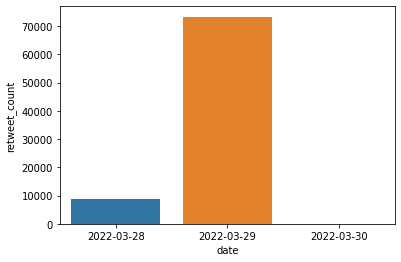

In [93]:
ax = sns.barplot(x = df_sum.index, y = df_sum.retweet_count)

In [94]:
# 
df_count = df_topic.groupby(by=["date"]).count()
df_count

,Unnamed: 0,id,retweet_count,date_created,tweet,clean_tweet,topic,time
date,,,,,,,,
2022-03-28,62,62,62,62,62,62,62,62
2022-03-29,251,251,251,251,251,251,251,251
2022-03-30,3,3,3,3,3,3,3,3


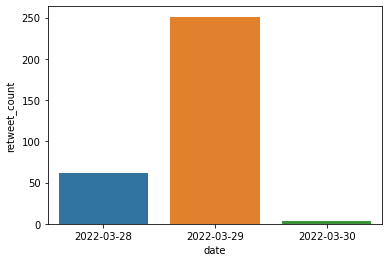

In [95]:
ax = sns.barplot(x = df_count.index, y = df_count.retweet_count)